<a href="https://colab.research.google.com/github/sofiavasqq/Vasquez_Labs/blob/main/Vasquez_Lab_9_Linear_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

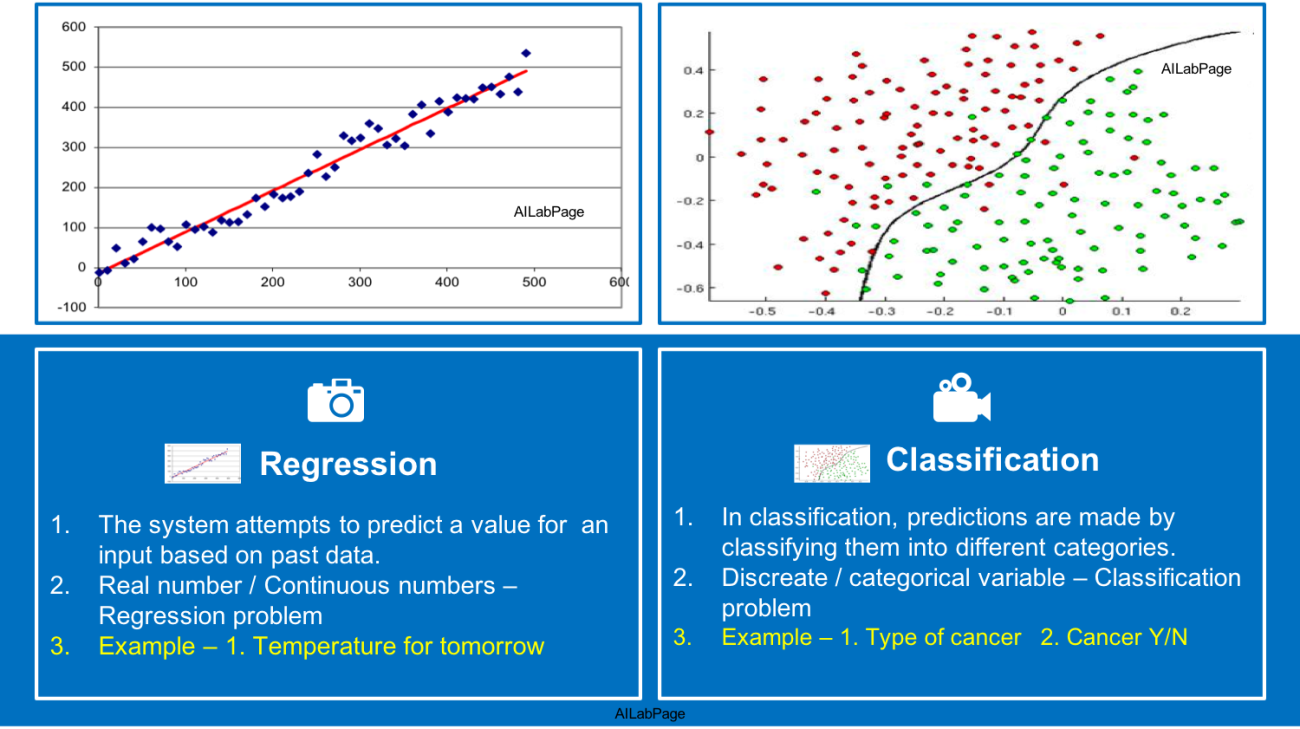

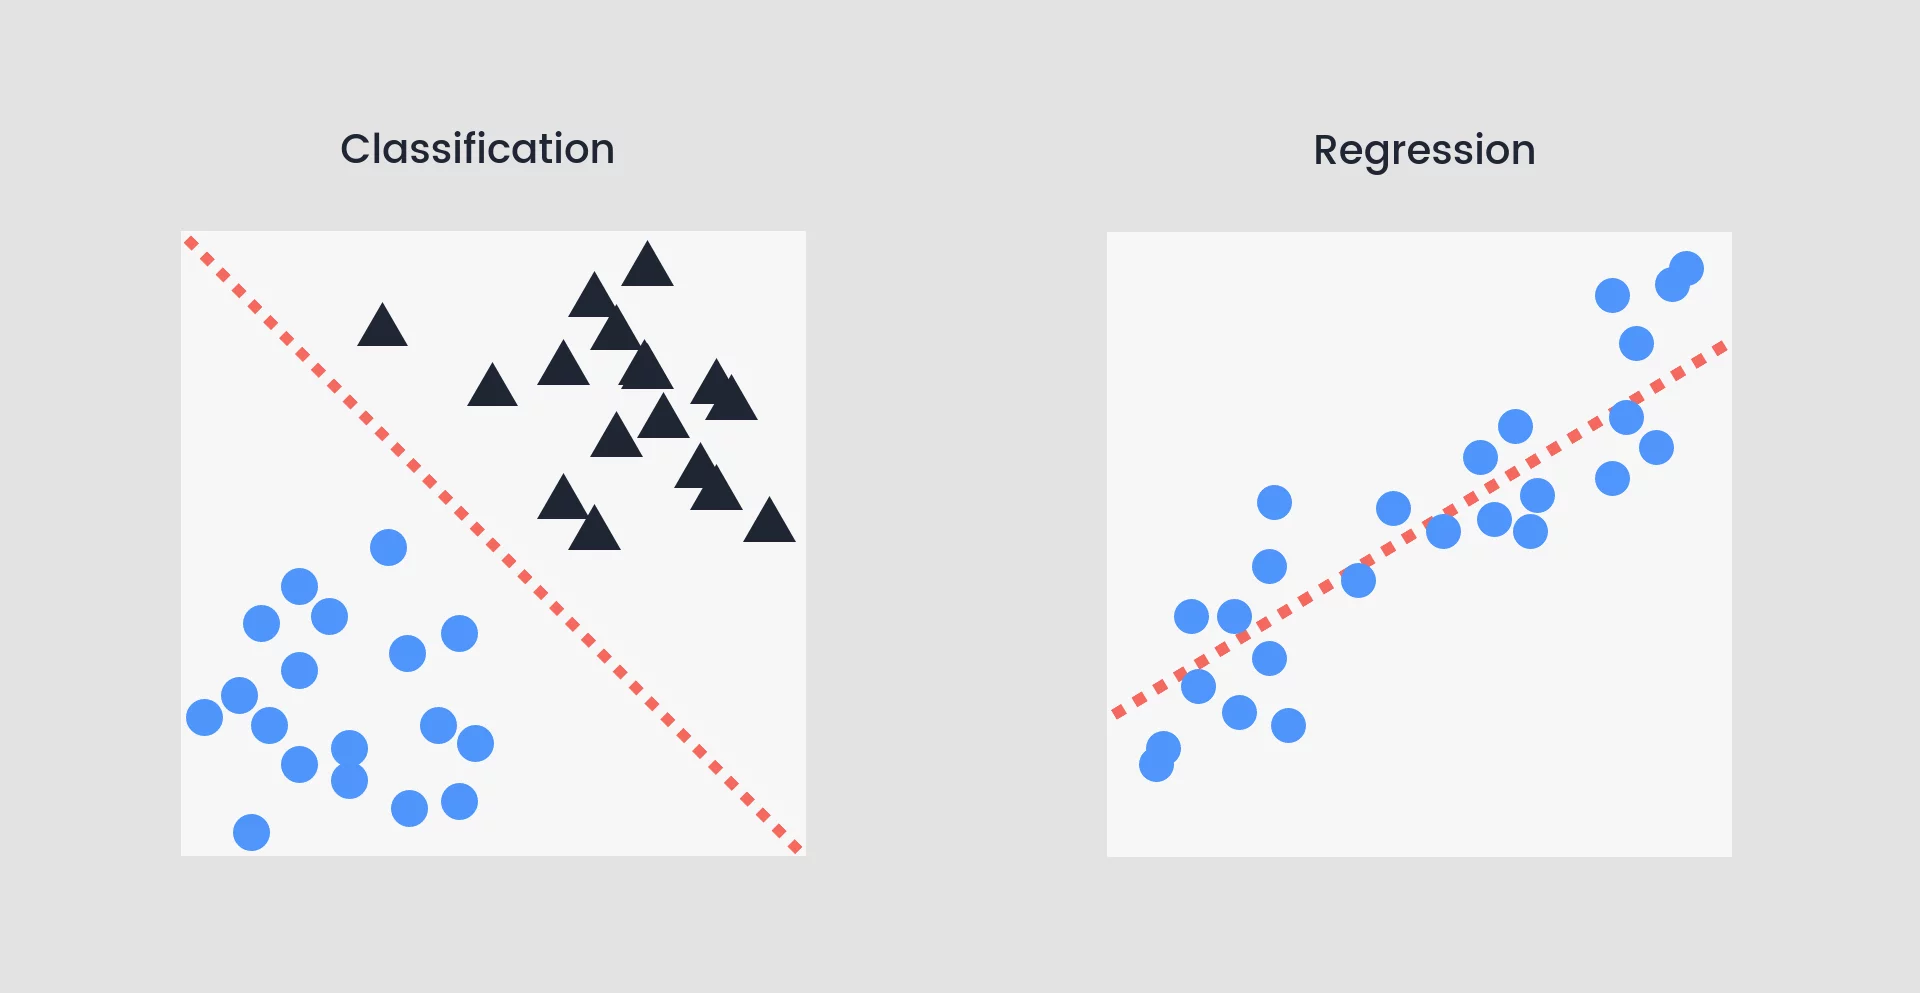

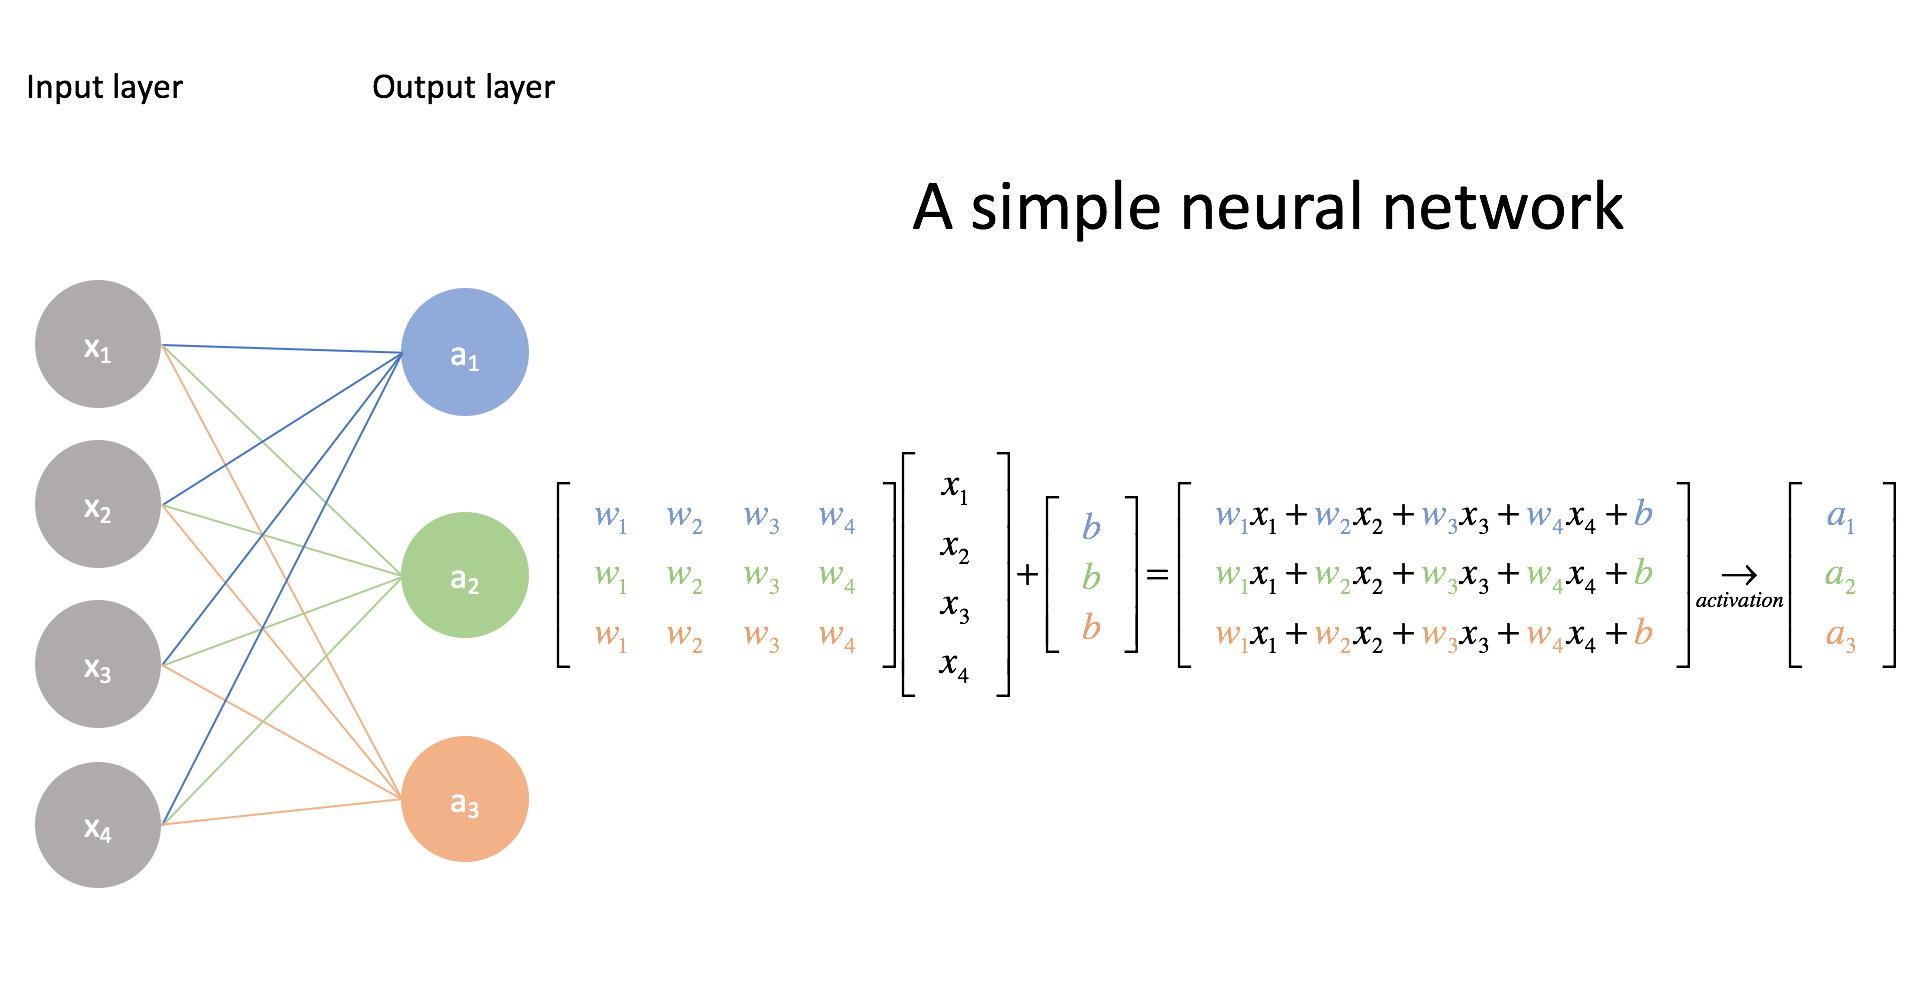

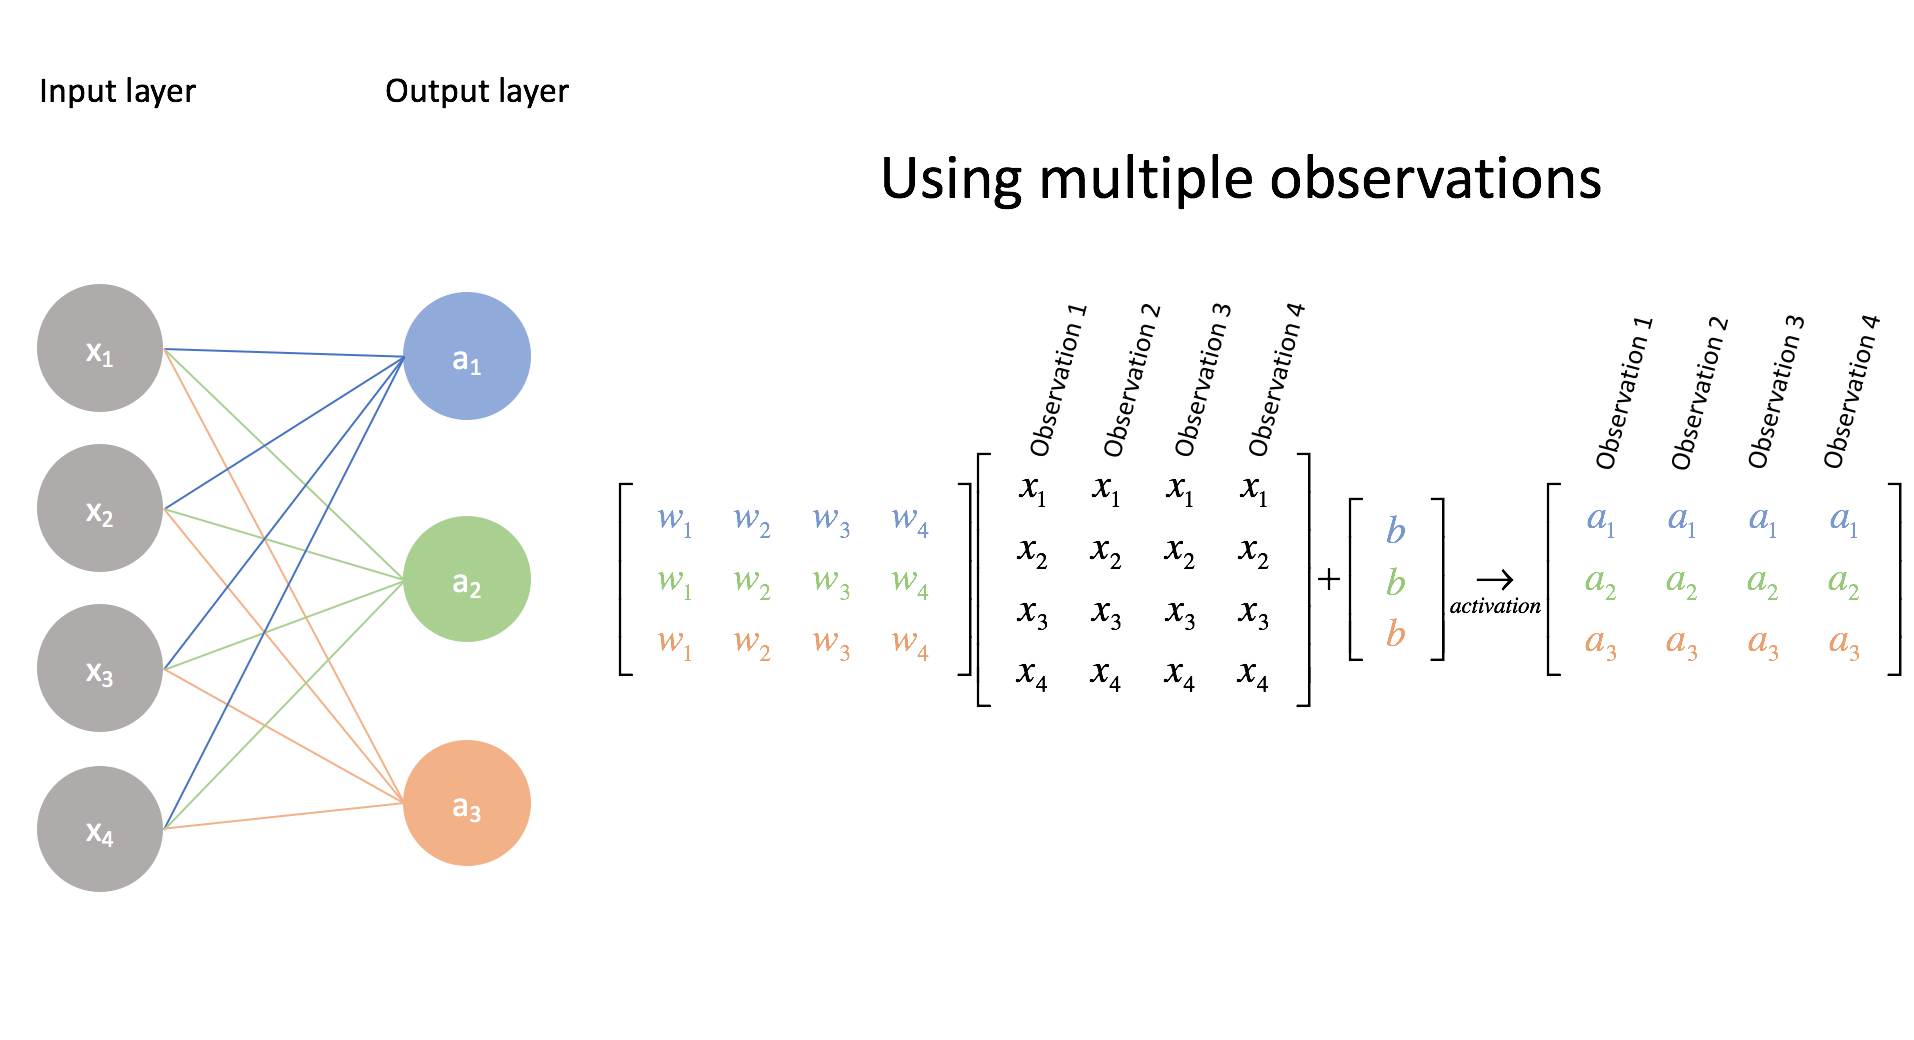

In [90]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import * #imports the files from Hahn's mpcr file on Github
import numpy as np #always start with numpy
import matplotlib.pyplot as plt #used for graphical plotting for images or graphs
!pip install wget
import wget #wget is a convenient solution for dowloading files through the url i am using
import torch #defines mathemeatical equations
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-exo24wuj
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-exo24wuj
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7682 sha256=21a0ef2603a480b317a3dffc88701c7bb5008ff18aeb8e0a8b0ae2affb7932ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-zgmx__rd/wheels/8e/ce/5f/35330a2ccb2f50a7b7061e8a8b87f1ebe8d617d383beddc76f
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=b6ce4b3e43f17306b4cf28f721a6a6f1d92237432b70b6938dcbdf6be367b082
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


# $y=mx+b$

In [91]:
def plot(x): #graphs
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()  #creates a figure and a set of subplots # using the variable ax for single a Axes
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show() #shows the results 

In [92]:
def montage_plot(x): #shows us a bunch our data at once by plotting a montage
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [93]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10))) #a specialized processor oriinally designed to accelerate grpahics rendering
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [94]:
##MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [95]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [96]:
X.shape #tells us the size of data we have; how many pixels

(60000, 1, 28, 28)

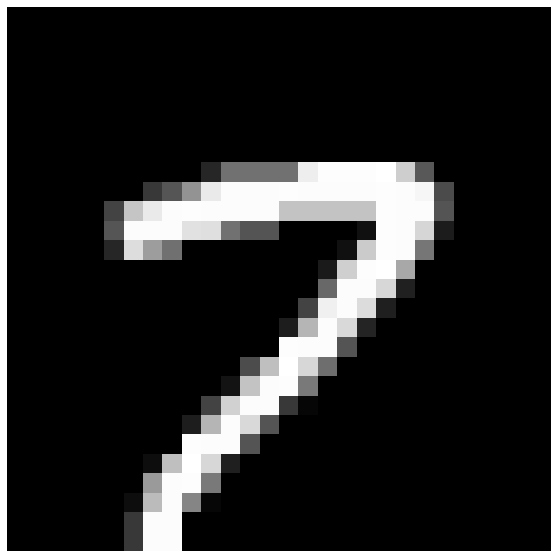

In [97]:
plot(X[123,0,0:28,0:28]) #shows us whatever image we want depending on the coordinates we give it

In [98]:
Y[123] #tells us what the number the image is projecting is

7

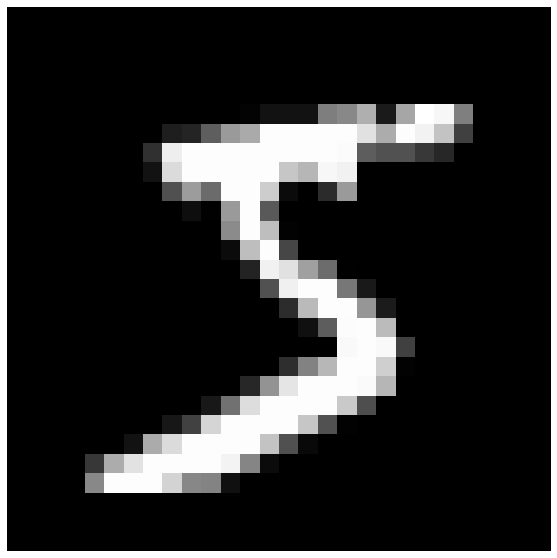

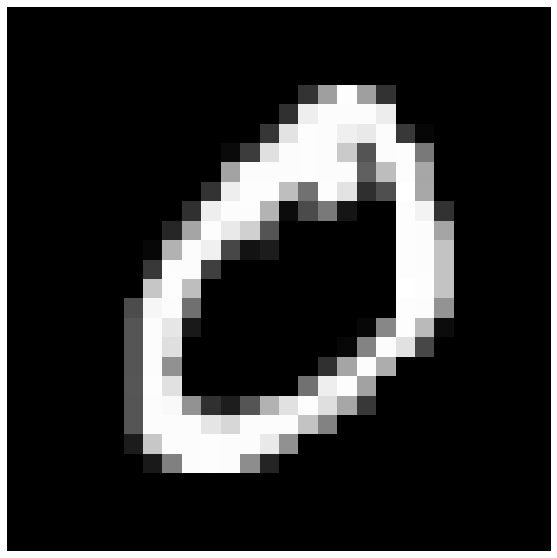

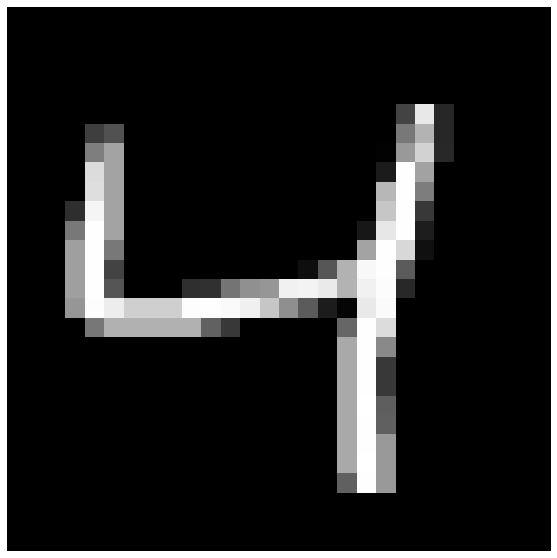

In [99]:
for i in range(3): #shows three images
    plot(X[i,0,:,:])

In [100]:
Y #tells us what the numbers each image has

array([5, 0, 4, ..., 5, 6, 8])

In [101]:
X[0:25,0,:,:].shape #tells us the amount of the data has

(25, 28, 28)

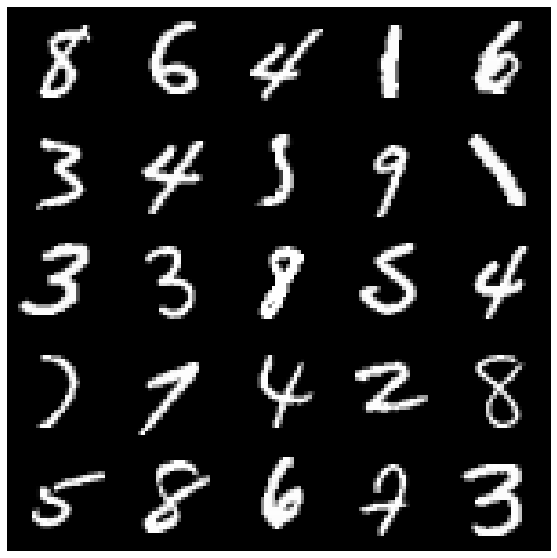

In [102]:
montage_plot(X[125:150,0,:,:]) #shows a certain amount of pixels

In [103]:
X.shape[0] #tells us the size of data we have; how many pixels

60000

In [104]:
X_test.shape #tells us how much the system has

(10000, 1, 28, 28)

In [105]:
X.shape[0] #tells us the size of data we have; how many pixels

60000

In [106]:
X_test.shape[0] 

10000

In [107]:
28*28 #using basic calculator python so that we can find out how many pixels we have

784

In [108]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [109]:
X.shape,X_test.shape #tells us the size of data we have; how many pixels

((60000, 784), (10000, 784))

In [110]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

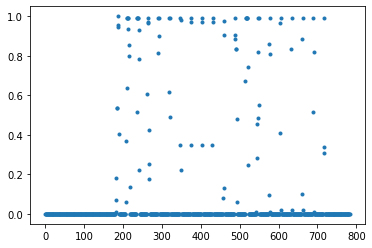

In [111]:
plt.plot(X[100],'.') #puts data on a dotted graph

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

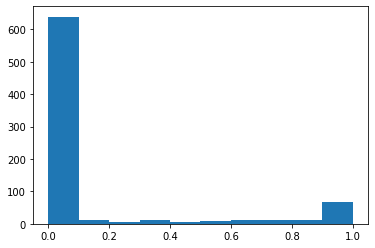

In [112]:
plt.hist(X[0])#puts data on a histogram

In [113]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test) #GPU is a faster and specialized processor originally designed to accelerate graphics rendering

In [114]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data") #retrieves data from the link

'W.data'

In [115]:
W = torch.load("W.data") #loads an object saved with torch.save from a file/uses Python's unpickling facilities

In [116]:
W.shape #tell us how much we have

torch.Size([784, 10])

In [117]:
X.shape #tells us the size of data we have; how many pixels

torch.Size([60000, 784])

In [118]:
def plot(x): #plots data
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots() #creates a figure and a set of subplots by creating a figure with only one 
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show() #projects the data onto a graph

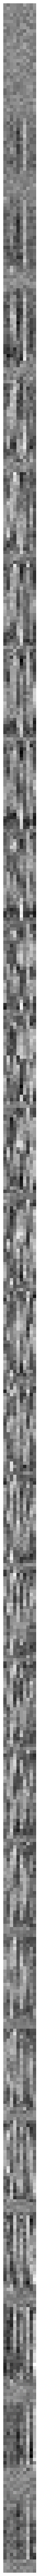

In [119]:
plot(W[0:784,:10]) #shows images

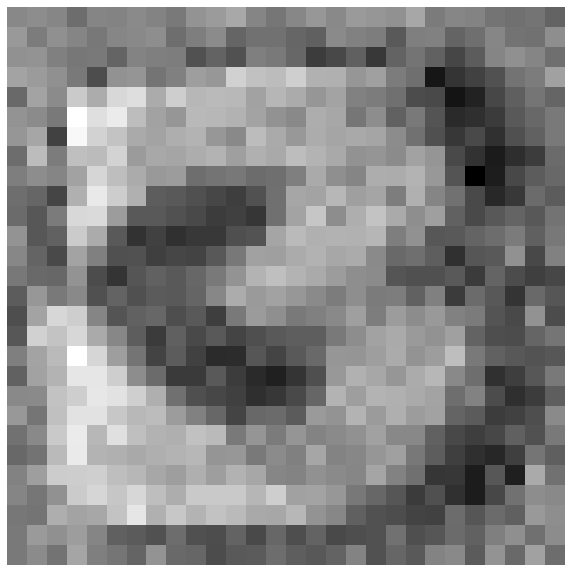

In [120]:
plot(W[:,3].reshape(28,28)) #reshapes the image to be 28*28 and then shwos the image

In [121]:
X.shape #tells us the size of data we have; how many pixels

torch.Size([60000, 784])

In [122]:
b = 40 #makes b 40

def get_batch(mode): #gives us some of the data
    if mode == "train": #gets a small batch of the data
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [123]:
x,y = get_batch('train') #gives us some of the data
    

In [124]:
x.shape #tells us the size of data we have; how many pixels

torch.Size([40, 784])

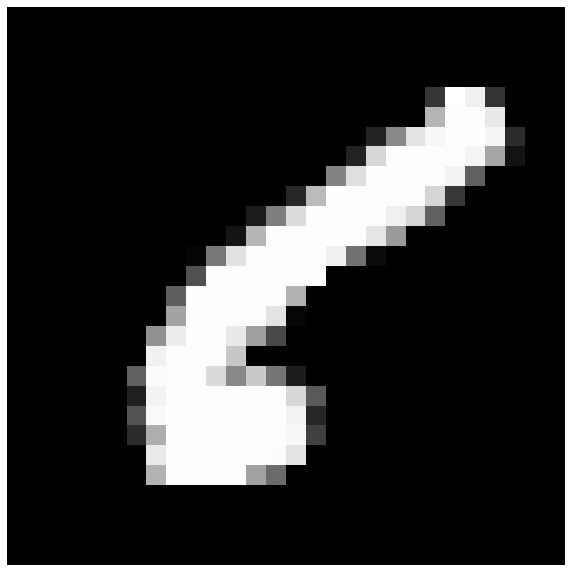

In [125]:
plot(x[0].reshape(28,28)) #reshapes image to be 28*28 and then shows it

In [126]:
y #list of all the answers

tensor([6., 6., 4., 4., 5., 5., 3., 8., 3., 7., 5., 4., 2., 4., 5., 9., 7., 3.,
        2., 4., 5., 1., 0., 4., 8., 1., 3., 7., 0., 4., 8., 6., 7., 2., 4., 0.,
        9., 3., 5., 6.], device='cuda:0')

In [127]:
x.shape, W.shape #tells us the size of data we have; how many pixels; how much we have

(torch.Size([40, 784]), torch.Size([784, 10]))

In [128]:
torch.matmul(x,W).shape #the inside dimenstions cancel out

torch.Size([40, 10])

In [129]:
(x@W).shape #tells us the amount of pixels we currently have

torch.Size([40, 10])

In [130]:
y = x@W #shortcut

In [131]:
y.shape #tells us the amount of data we have

torch.Size([40, 10])

In [132]:
y

tensor([[ 2.6273e+00, -1.1072e+00, -3.7429e+00, -5.7063e+00, -2.0498e+00,
          3.9929e+00, -3.9081e+00, -1.1729e+01,  4.2484e+00, -1.1845e+01],
        [ 4.7949e+00, -8.3823e+00, -2.8460e+00, -1.5913e+00,  2.5695e+00,
          9.0511e+00,  2.6565e+00, -1.1739e+01,  4.8440e+00, -4.9595e+00],
        [-5.2226e+00, -1.4936e+01, -7.6982e+00, -1.4137e+01,  5.7890e+00,
          1.4568e+00, -9.0380e-01,  1.9918e-01,  7.3237e+00,  8.0383e+00],
        [-5.1402e-01, -1.3696e+01, -2.0573e+00, -8.1784e+00,  8.4520e+00,
         -3.8444e+00,  1.0989e+00,  2.2127e-01,  3.6564e+00,  3.1954e+00],
        [ 3.4103e+00, -8.0526e+00, -7.6883e+00, -1.0372e+01, -4.7959e+00,
          1.1273e+00, -3.4369e+00, -2.3828e-02,  2.9217e+00, -5.3976e+00],
        [ 2.4999e+00, -1.1565e+01, -4.1723e+00, -2.2068e-01,  5.5463e+00,
          8.6239e+00,  3.3352e+00, -8.0884e+00,  5.1105e+00,  2.8656e+00],
        [ 2.3013e+00, -4.9016e-01, -2.6113e-01,  1.2823e+01, -1.3100e+01,
         -1.3413e+00, -1.0964e+0

In [133]:
torch.argmax(y,1) #Returns the sum of all elements in the input tensor.

tensor([8, 5, 9, 4, 0, 5, 3, 8, 3, 7, 5, 4, 2, 4, 5, 9, 7, 3, 0, 4, 5, 1, 0, 9,
        8, 1, 3, 7, 0, 4, 8, 6, 7, 2, 8, 0, 8, 3, 5, 6], device='cuda:0')

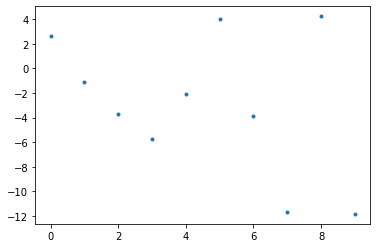

In [134]:
plt.plot(y[0].cpu().detach().numpy().T,'.') #graphs data

https://eleif.net/clicktimer.html

In [135]:
x@W #the @ is a shortcut that does the same thing as matrix multiple

tensor([[ 2.6273e+00, -1.1072e+00, -3.7429e+00, -5.7063e+00, -2.0498e+00,
          3.9929e+00, -3.9081e+00, -1.1729e+01,  4.2484e+00, -1.1845e+01],
        [ 4.7949e+00, -8.3823e+00, -2.8460e+00, -1.5913e+00,  2.5695e+00,
          9.0511e+00,  2.6565e+00, -1.1739e+01,  4.8440e+00, -4.9595e+00],
        [-5.2226e+00, -1.4936e+01, -7.6982e+00, -1.4137e+01,  5.7890e+00,
          1.4568e+00, -9.0380e-01,  1.9918e-01,  7.3237e+00,  8.0383e+00],
        [-5.1402e-01, -1.3696e+01, -2.0573e+00, -8.1784e+00,  8.4520e+00,
         -3.8444e+00,  1.0989e+00,  2.2127e-01,  3.6564e+00,  3.1954e+00],
        [ 3.4103e+00, -8.0526e+00, -7.6883e+00, -1.0372e+01, -4.7959e+00,
          1.1273e+00, -3.4369e+00, -2.3828e-02,  2.9217e+00, -5.3976e+00],
        [ 2.4999e+00, -1.1565e+01, -4.1723e+00, -2.2068e-01,  5.5463e+00,
          8.6239e+00,  3.3352e+00, -8.0884e+00,  5.1105e+00,  2.8656e+00],
        [ 2.3013e+00, -4.9016e-01, -2.6113e-01,  1.2823e+01, -1.3100e+01,
         -1.3413e+00, -1.0964e+0

In [136]:
y2 = x@W #uses smore numbers

In [137]:
y2.shape #tells us the amount of pixels in a image

torch.Size([40, 10])

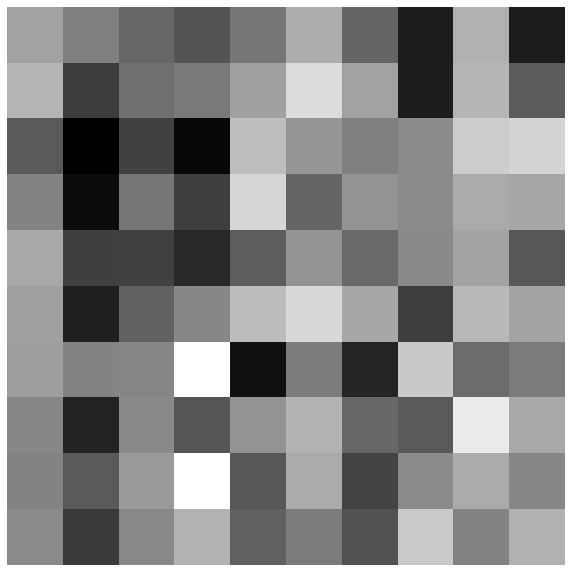

In [138]:
plot(y2[0:10,:])#shows 10 columns worth of pixels

In [139]:
y

tensor([[ 2.6273e+00, -1.1072e+00, -3.7429e+00, -5.7063e+00, -2.0498e+00,
          3.9929e+00, -3.9081e+00, -1.1729e+01,  4.2484e+00, -1.1845e+01],
        [ 4.7949e+00, -8.3823e+00, -2.8460e+00, -1.5913e+00,  2.5695e+00,
          9.0511e+00,  2.6565e+00, -1.1739e+01,  4.8440e+00, -4.9595e+00],
        [-5.2226e+00, -1.4936e+01, -7.6982e+00, -1.4137e+01,  5.7890e+00,
          1.4568e+00, -9.0380e-01,  1.9918e-01,  7.3237e+00,  8.0383e+00],
        [-5.1402e-01, -1.3696e+01, -2.0573e+00, -8.1784e+00,  8.4520e+00,
         -3.8444e+00,  1.0989e+00,  2.2127e-01,  3.6564e+00,  3.1954e+00],
        [ 3.4103e+00, -8.0526e+00, -7.6883e+00, -1.0372e+01, -4.7959e+00,
          1.1273e+00, -3.4369e+00, -2.3828e-02,  2.9217e+00, -5.3976e+00],
        [ 2.4999e+00, -1.1565e+01, -4.1723e+00, -2.2068e-01,  5.5463e+00,
          8.6239e+00,  3.3352e+00, -8.0884e+00,  5.1105e+00,  2.8656e+00],
        [ 2.3013e+00, -4.9016e-01, -2.6113e-01,  1.2823e+01, -1.3100e+01,
         -1.3413e+00, -1.0964e+0

In [141]:
one_hot(y) #colab works up until this point i dont know why

ValueError: ignored

In [142]:
plot(one_hot(y)) #shows what it is

ValueError: ignored

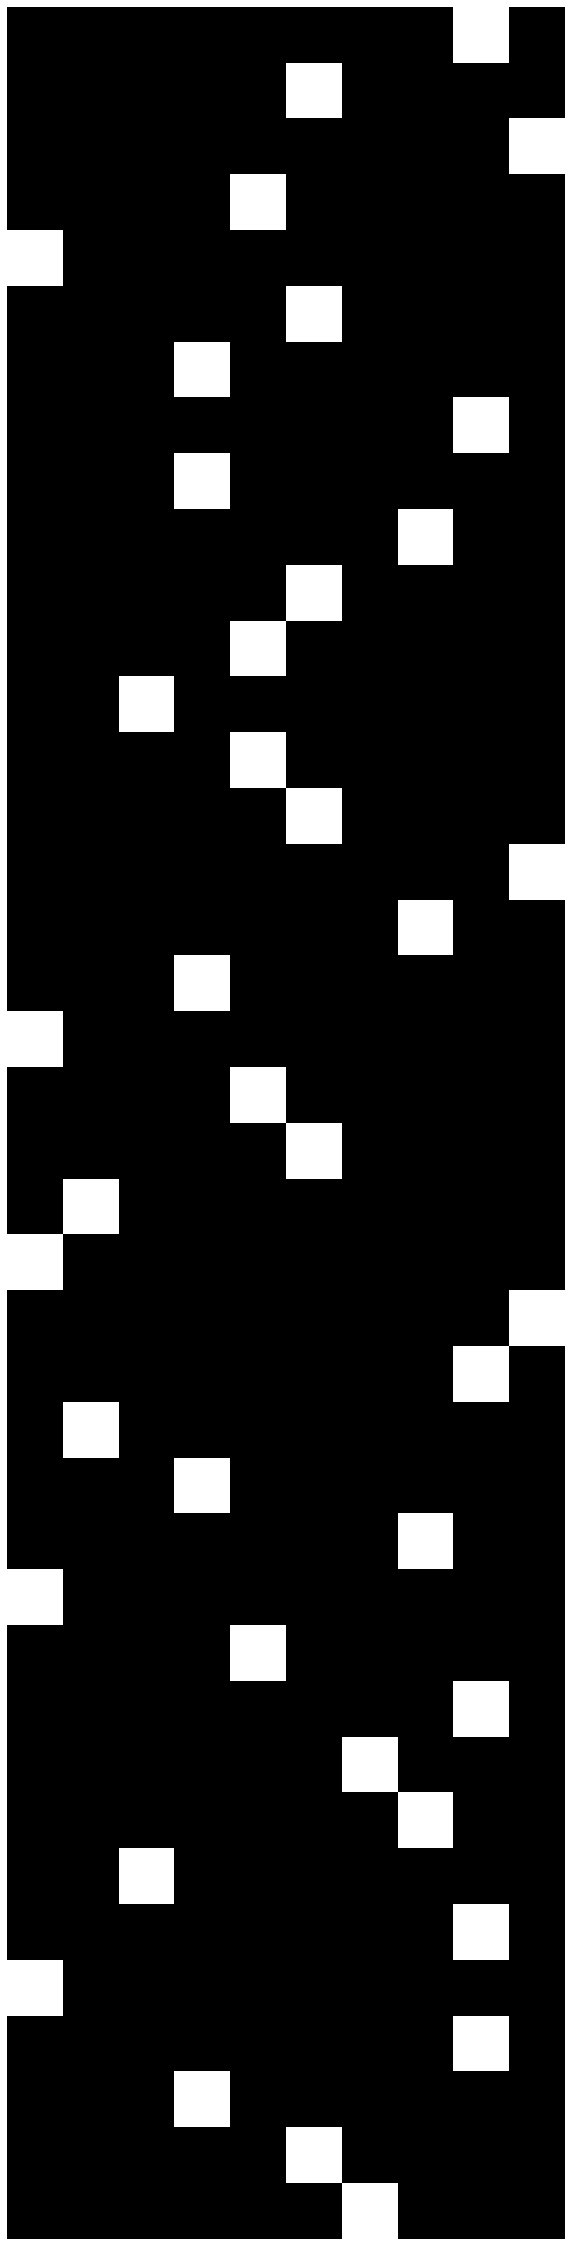

In [143]:
plot(one_hot(torch.argmax(y2,1))) #fills in one at a time

In [144]:
y

tensor([[ 2.6273e+00, -1.1072e+00, -3.7429e+00, -5.7063e+00, -2.0498e+00,
          3.9929e+00, -3.9081e+00, -1.1729e+01,  4.2484e+00, -1.1845e+01],
        [ 4.7949e+00, -8.3823e+00, -2.8460e+00, -1.5913e+00,  2.5695e+00,
          9.0511e+00,  2.6565e+00, -1.1739e+01,  4.8440e+00, -4.9595e+00],
        [-5.2226e+00, -1.4936e+01, -7.6982e+00, -1.4137e+01,  5.7890e+00,
          1.4568e+00, -9.0380e-01,  1.9918e-01,  7.3237e+00,  8.0383e+00],
        [-5.1402e-01, -1.3696e+01, -2.0573e+00, -8.1784e+00,  8.4520e+00,
         -3.8444e+00,  1.0989e+00,  2.2127e-01,  3.6564e+00,  3.1954e+00],
        [ 3.4103e+00, -8.0526e+00, -7.6883e+00, -1.0372e+01, -4.7959e+00,
          1.1273e+00, -3.4369e+00, -2.3828e-02,  2.9217e+00, -5.3976e+00],
        [ 2.4999e+00, -1.1565e+01, -4.1723e+00, -2.2068e-01,  5.5463e+00,
          8.6239e+00,  3.3352e+00, -8.0884e+00,  5.1105e+00,  2.8656e+00],
        [ 2.3013e+00, -4.9016e-01, -2.6113e-01,  1.2823e+01, -1.3100e+01,
         -1.3413e+00, -1.0964e+0

In [145]:
torch.argmax(y2,1) #returns the indices of the max. values along an axis

tensor([8, 5, 9, 4, 0, 5, 3, 8, 3, 7, 5, 4, 2, 4, 5, 9, 7, 3, 0, 4, 5, 1, 0, 9,
        8, 1, 3, 7, 0, 4, 8, 6, 7, 2, 8, 0, 8, 3, 5, 6], device='cuda:0')

In [146]:
b

40

In [147]:
torch.sum(y == torch.argmax(y2,1))/b #returns the sum of all elements in the input tensor

RuntimeError: ignored

In [148]:
X.shape #tells us the size of the data we have; how many pixels in the image

torch.Size([60000, 784])

In [149]:
%%timeit
X[20000]@W #the @ is a shortcut that does the same thing as matrix multiple(matmul)

27.9 µs ± 595 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [150]:
torch.argmax(X@W,1) #Returns the indices of the maximum values along an axis.

tensor([5, 0, 4,  ..., 5, 6, 8], device='cuda:0')

In [151]:
Y

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [152]:
torch.sum(torch.argmax(X@W,1) == Y)/60000 #Returns the sum of all elements in the input tensor.

tensor(0.9122, device='cuda:0')

In [153]:
X@W #the @ is a shortcut that does the same thing as matrix multiple

tensor([[  1.1735,  -5.3252,  -2.2280,  ...,   2.8160,  -2.5256,  -4.7146],
        [ 14.1848, -13.8266,  -2.0614,  ...,  -2.7536,  -0.4526,  -5.3169],
        [ -3.9527,  -9.5646,  -3.1270,  ...,  -0.5796,  -2.7272,   0.5264],
        ...,
        [  1.7139,  -3.4259, -10.8608,  ...,  -0.3874,   5.0143,   0.4739],
        [  3.0898, -10.5911,  -2.0102,  ...,  -4.0874,  -7.1931,  -2.6339],
        [  2.8741,  -6.6511,  -1.8780,  ...,  -3.2709,   7.5771,   1.3491]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [154]:
W.shape #tells us how much we have

torch.Size([784, 10])

In [155]:
W[:,0].shape #tells us how much we have

torch.Size([784])

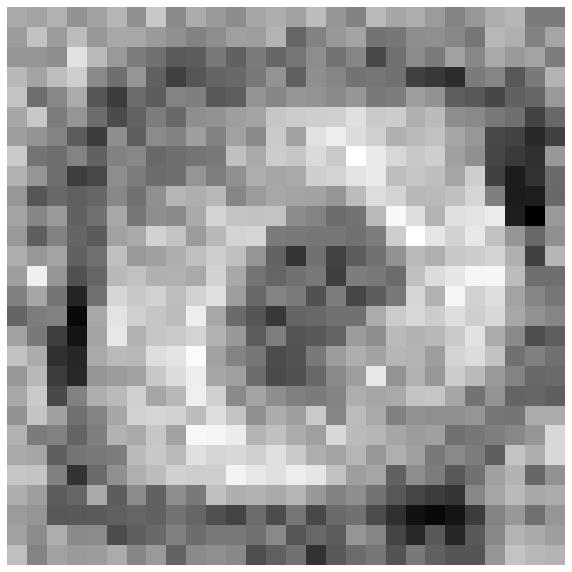

In [156]:
plot(W[:,0].reshape(28,28)) #reshapes image based on measurements

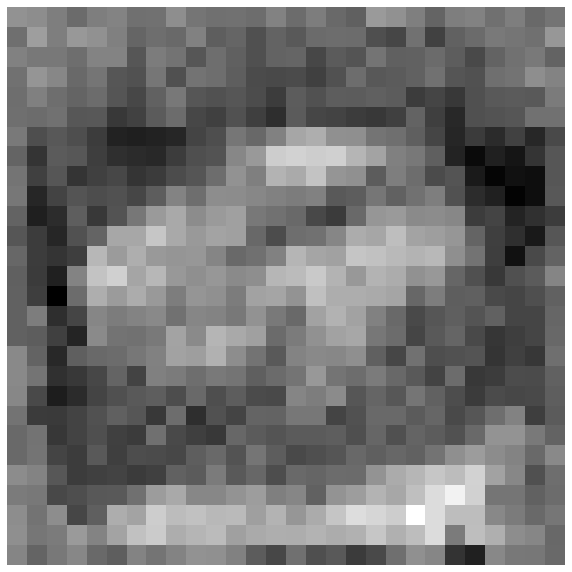

In [157]:
plot(W[:,9].reshape(28,28)) #reshapes images based on measurements

In [158]:
W.shape #tells us how much we have 

torch.Size([784, 10])

In [159]:
(W.T).shape #tells us how many pixels does the image compose of

torch.Size([10, 784])

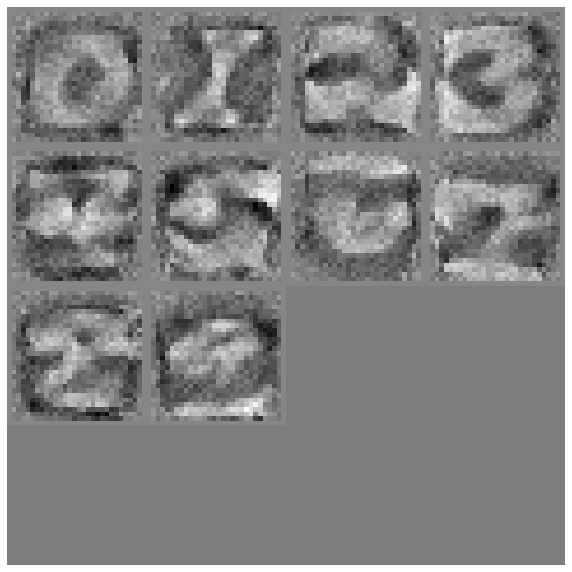

In [160]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [161]:
###################################################

In [162]:
def softmax(x): # transforms each element of a collection by computing the exponential of each element divided by the sum of the exponentials of all the elements.
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [163]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [164]:
def Truncated_Normal(size): #Truncated Normal Random Numbers

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [165]:
def acc(out,y):  #measures where in the output could you get the maxinmum output
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [166]:
X.shape #tells us the size of data we have; how many pixels

torch.Size([60000, 784])

In [167]:
def get_batch(mode): #gives us some of the data
    b = c.b
    if mode == "train": #gets a small batch of the data
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [168]:
def model(x,w):

    return x@w[0]

In [169]:
def make_plots(): #does exactly what the code says, makes plots
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [170]:
wb.init(project="Simple_Linear_Adam_KMNIST"); #makes a chart for us and how well is out classification happening
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 1000 #how many times we run it

w = [GPU(Truncated_Normal((784,10)))] #starts our model randomly

optimizer = torch.optim.Adam(w, lr=c.h)   #update w

for i in range(c.epochs):

    x,y = get_batch('train') #gets a small batch of the data

    loss = cross_entropy(softmax(model(x,w)),y) #softmax maks sure everything adds up

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() #use the loss function to update w
   
    wb.log({"loss": loss})

    make_plots()

    # if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/usr/local/lib/python3.8/dist-packages/mpcr/__init__.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


#Generator

In [171]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [172]:
def GPU(data): #a specialized processor originally designed to accelerate graphics rendering.
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

In [173]:
def plot(x):  #graphs
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots() #creates a figure and a set of subplots # using the variable ax for single a Axes
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show() #shows the results 
     

In [174]:
batch_size = 512

In [175]:
# #MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [176]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [177]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [180]:
X.shape,Y.shape,X_test.shape,Y_test.shape #tells us the size of the image

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [181]:
###################################################

In [182]:
def GPU(data): #a specialized processor originally designed to accelerate graphics rendering.
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data): #a specialized processor originally designed to accelerate graphics rendering.
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [183]:
X = GPU_data(X) #a specialized processor originally designed to accelerate graphics rendering.
X_test = GPU_data(X_test)

Y = GPU_data(Y) #a specialized processor originally designed to accelerate graphics rendering.
Y_test = GPU_data(Y_test)

In [184]:
X = (X + 1)/2 #equals X to this equation
X_test = (X_test + 1)/2

In [185]:
def get_batch(mode): #a specialized processor originally designed to accelerate graphics rendering.
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y

In [186]:
x,y = get_batch('train') #a specialized processor originally designed to accelerate graphics rendering.

(array([284209.,  13355.,  10821.,   9579.,  10493.,  11394.,  14860.,
         18050.,  18509.,  10138.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

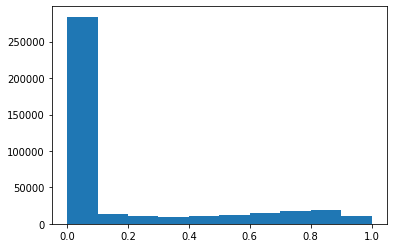

In [187]:
plt.hist(x.flatten().cpu().numpy()) #puts data onto a histrogram

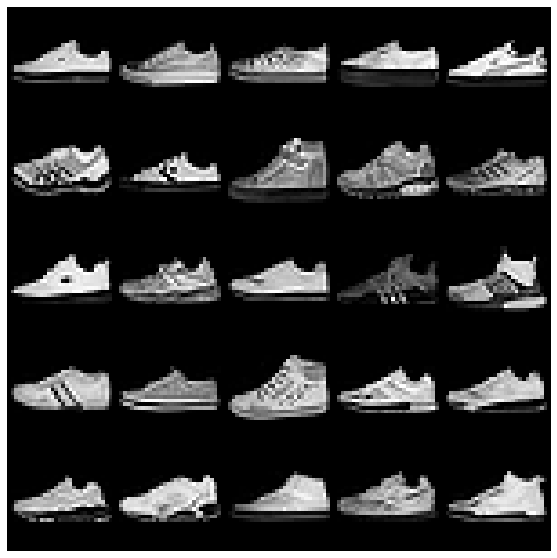

In [189]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy()) #plots image

In [190]:
X = X.view(-1,784)
X_test = X_test.view(-1,784)

def get_batch(mode): #gives us some of the data
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [191]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #torch.device is  an object representing the device on which a torch.Tensor is or will be allocated.

In [192]:
def MSE(image_batch_recon, image_batch): #mse stands for mean squared error
    return torch.mean((image_batch_recon - image_batch)**2)

In [193]:
def Encoder(x,w): #responsible for returning the encoded form of any given string.
    return x@w[0]

In [194]:
def Decoder(x,w): #method specified in Strings in Python 2.
    return x@(w[0].T)

In [195]:
def Autoencoder(x,w): #an Artificial Neural Network that is used to decompress and compress the input data provided in an unsupervised manner. 
    return Decoder(Encoder(x,w),w)

In [196]:
batch_size = 512
steps = 10000
learning_rate = 4e-3

In [197]:
w0 = GPU(randn_trunc((784,78)))
w = [w0]

optimizer = torch.optim.Adam(params=w, lr=learning_rate, weight_decay=1e-5)

for step in range(steps):
        
    x,y = get_batch('train')
    
    # autoencoder reconstruction
    x2 = Autoencoder(x,w)
    
    # reconstruction error
    loss = MSE(x2, x)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if step % 1000 == 0:
        print(loss.item())

0.40089544653892517
0.0045299893245100975
0.0034198358189314604
0.0032902562525123358
0.0034734271466732025
0.003358027897775173
0.0034394136164337397
0.0030923625454306602
0.003204339649528265
0.0035735948476940393


In [198]:
# batch_size = 16

In [199]:
x,y = get_batch('test')

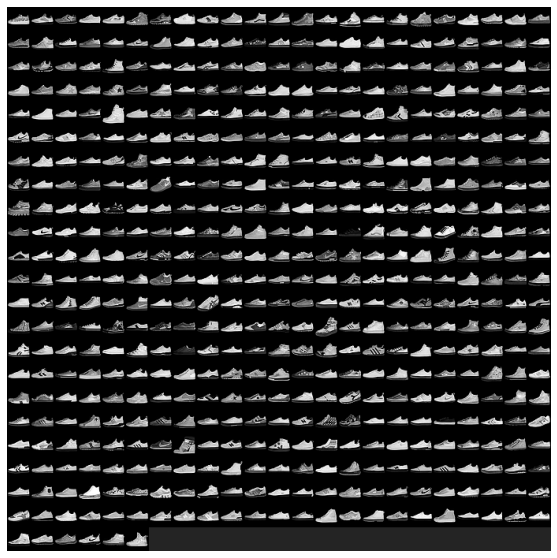

In [201]:
montage_plot(x.reshape(-1,28,28).detach().cpu().numpy()) #plots image based on coordinates

In [202]:
x.shape #tells us how much we have

torch.Size([512, 784])

In [203]:
Decoder(Encoder(x,w),w).shape # used to convert from one encoding scheme, in which argument string is encoded to the desired encoding scheme.

torch.Size([512, 784])

In [204]:
x2 = Autoencoder(x,w)

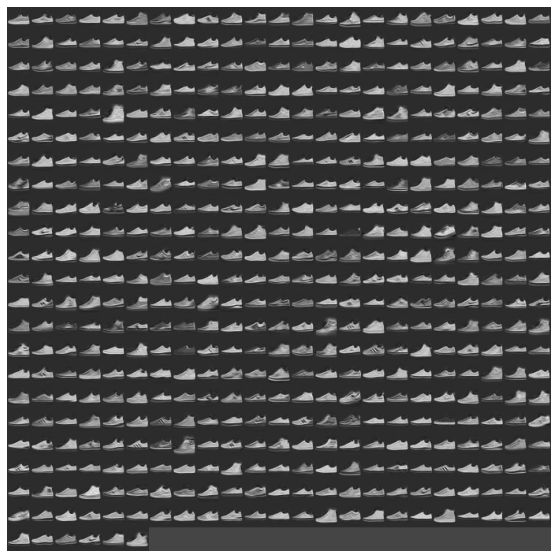

In [205]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy()) #plots a montage

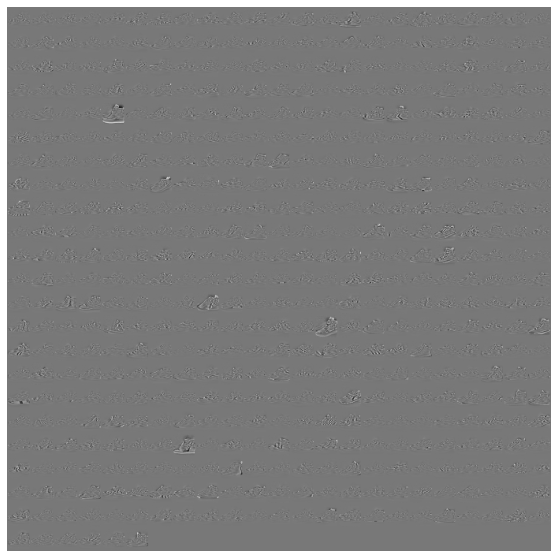

In [206]:
montage_plot((x-x2).reshape(-1,28,28).detach().cpu().numpy()) #plots a montage

In [207]:
w[0].shape #tells us how many pixels

torch.Size([784, 78])

In [208]:
wp = w[0].T 

In [209]:
wp = wp.reshape(-1,28,28) #reshapes image

In [210]:
wp.shape #tells us how many pixels the image has

torch.Size([78, 28, 28])

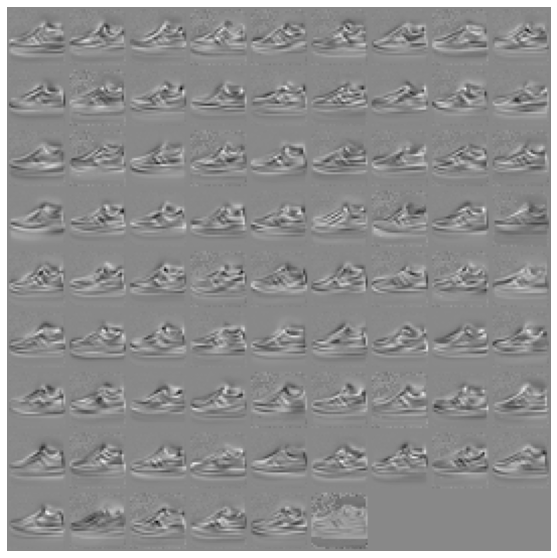

In [211]:
montage_plot(wp.detach().cpu().numpy())#plots a montage

In [212]:
x.shape #Tells how many pixels are in the image

torch.Size([512, 784])

In [213]:
x = x[0:1] #makes x the first row in the image?

In [214]:
y = Encoder(x,w)

In [215]:
y.shape #tells us how  big the image is

torch.Size([1, 78])

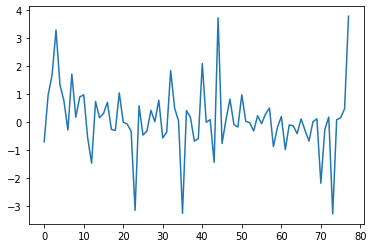

In [216]:
plt.plot(y[0].cpu().detach().numpy()) #plots data

In [217]:
noise = 0.5*np.random.randn(78) #randomizes

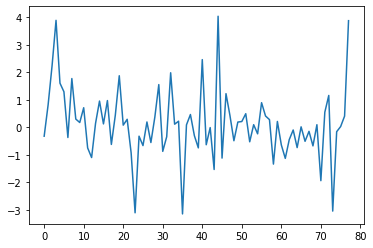

In [218]:
plt.plot(y[0].cpu().detach().numpy() + noise) #plots image

In [219]:
noise #random variation

array([ 0.38030237, -0.14425887,  0.55580167,  0.59504918,  0.27521525,
        0.53286577, -0.08644026,  0.05347126,  0.12296488, -0.72175461,
       -0.26506757, -0.19024571,  0.37182901, -0.59004309,  0.80053479,
       -0.18052354,  0.26656085, -0.3596551 ,  0.74416968,  0.83249586,
        0.08210606,  0.36139228, -0.5962127 ,  0.0521983 , -0.90629093,
       -0.1972708 ,  0.51584016, -0.97209921,  0.36131204,  0.77057519,
       -0.30494002,  0.0199256 ,  0.14193979, -0.38786158,  0.18625011,
        0.1173421 , -0.32196733,  0.29531244,  0.37918637, -0.15701253,
        0.36436361, -0.62439223, -0.09595302, -0.09065154,  0.30672239,
       -0.34946218,  1.1388301 , -0.39388566, -0.40229946,  0.36984144,
       -0.76640658,  0.46585384, -0.50157692,  0.41306312, -0.46229507,
        0.95395303,  0.12530804, -0.22092851, -0.45582426,  0.41080874,
       -0.83919404, -0.14683376, -0.34443936,  0.03631641, -0.32214965,
       -0.09793753, -0.20678088,  0.53470658, -0.68750414, -0.02

In [220]:
noise = GPU(noise) 

In [221]:
x2 = Decoder(y+noise,w) # used to convert from one encoding scheme, in which argument string is encoded to the desired encoding scheme.

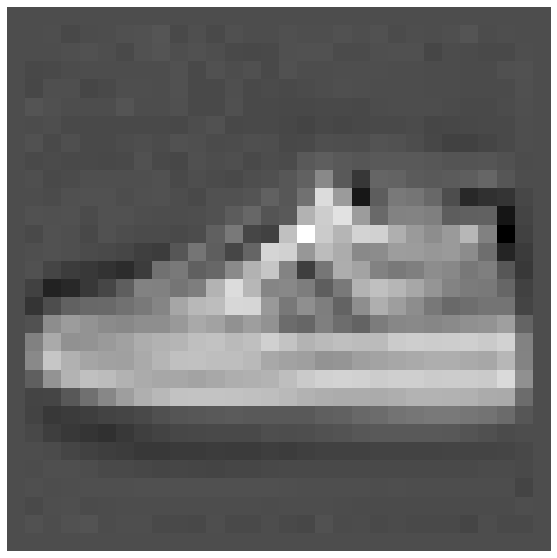

In [222]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy()) #plots a montage

In [223]:
x2 = Decoder(y,w) # used to convert from one encoding scheme, in which argument string is encoded to the desired encoding scheme.

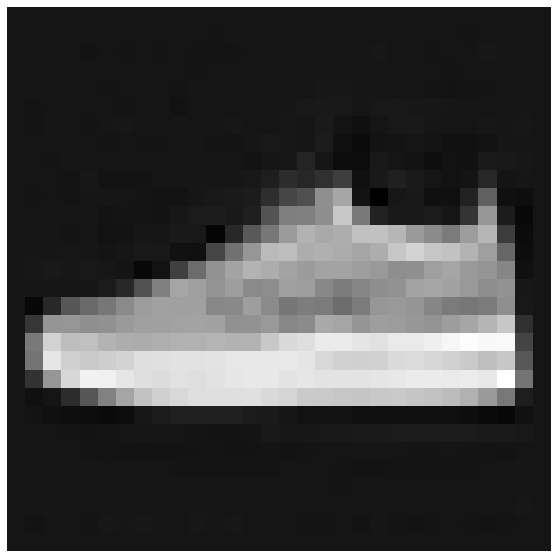

In [224]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy()) #plots a montage